# Analyse des compétences des enseignants du Cnam en région Centre-Val de Loire sur 2020

## Etude sur un échantillon de 54 enseignants sur 2020

## Importation des librairies et lecture du fichier csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cnam_ens_2020 = pd.read_csv("C:/Users/amandine.gauberville/dataV2-labs/Cnam/Compétences transversales enseignants final 2020.csv", sep=";")

In [3]:
cnam_ens_2020.head(5)

,Domaines de compétences,Compétences - Mots Clefs,S / SE / SF,Compétences selon Agrément,Compétences selon Autoévaluation
0,"Electroniques, électrotechnique, automatique e...",Conception assistée par ordinateur,S,5,0
1,"Electroniques, électrotechnique, automatique e...",Langage VHDL,S,5,0
2,"Electroniques, électrotechnique, automatique e...",Programmation des microcontrôleurs,S,5,0
3,Animation de parcours et/ou séquence de formation,Savoir ajuster son animation en fonction du ni...,SF,0,0
4,Animation de parcours et/ou séquence de formation,Séance 0 : Introduire l'intervention en présen...,SF,0,0


In [4]:
cnam_ens_2020.columns = ['domaines', 'competences', 'type_savoir',
       'competence_expertise', 'competence_transversales']

In [5]:
#Supprimer lorsque les enseignants n'ont pas répondu au questionnaire d'auto-évaluation

index_with_nan = cnam_ens_2020.query('competence_expertise == 0 & competence_transversales == 0').index
len(index_with_nan)

64

In [6]:
cnam_ens_2020.drop(index_with_nan, axis=0, inplace=True)

In [7]:
cnam_ens_2020.head(5)

,domaines,competences,type_savoir,competence_expertise,competence_transversales
0,"Electroniques, électrotechnique, automatique e...",Conception assistée par ordinateur,S,5,0
1,"Electroniques, électrotechnique, automatique e...",Langage VHDL,S,5,0
2,"Electroniques, électrotechnique, automatique e...",Programmation des microcontrôleurs,S,5,0
67,Commerce - Vente,Politique commerciale,S,5,0
68,Commerce - Vente,Vente prospection politique commerciale,S,5,0


In [8]:
cnam_ens_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4961
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   domaines                  4859 non-null   object
 1   competences               4897 non-null   object
 2   type_savoir               4866 non-null   object
 3   competence_expertise      4898 non-null   int64 
 4   competence_transversales  4898 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 229.6+ KB


#### Quelles sont les compétences d'expertise sur l'échantillon d'enseignants sur 2020?

In [9]:
df_expertise = cnam_ens_2020.query('competence_expertise != 0')
df_expertise.groupby(['domaines'])['competence_expertise'].count().sort_values(ascending=False)

domaines
Management et Gestion de l'entreprise                               296
Ingénierie mécanique et matériaux                                   125
Informatique                                                        125
Electroniques, électrotechnique, automatique et mesure (EEAM)       119
Psychologie                                                          81
Bâtiment, construction et énergie                                    69
Marketing                                                            63
Mathématiques et Statistiques                                        51
Droit                                                                49
Comptabilité Contrôle Audit (CCA)                                    47
Santé solidarité                                                     45
Langue                                                               40
Innovation                                                           33
Santé, Sécurité et environnement                       

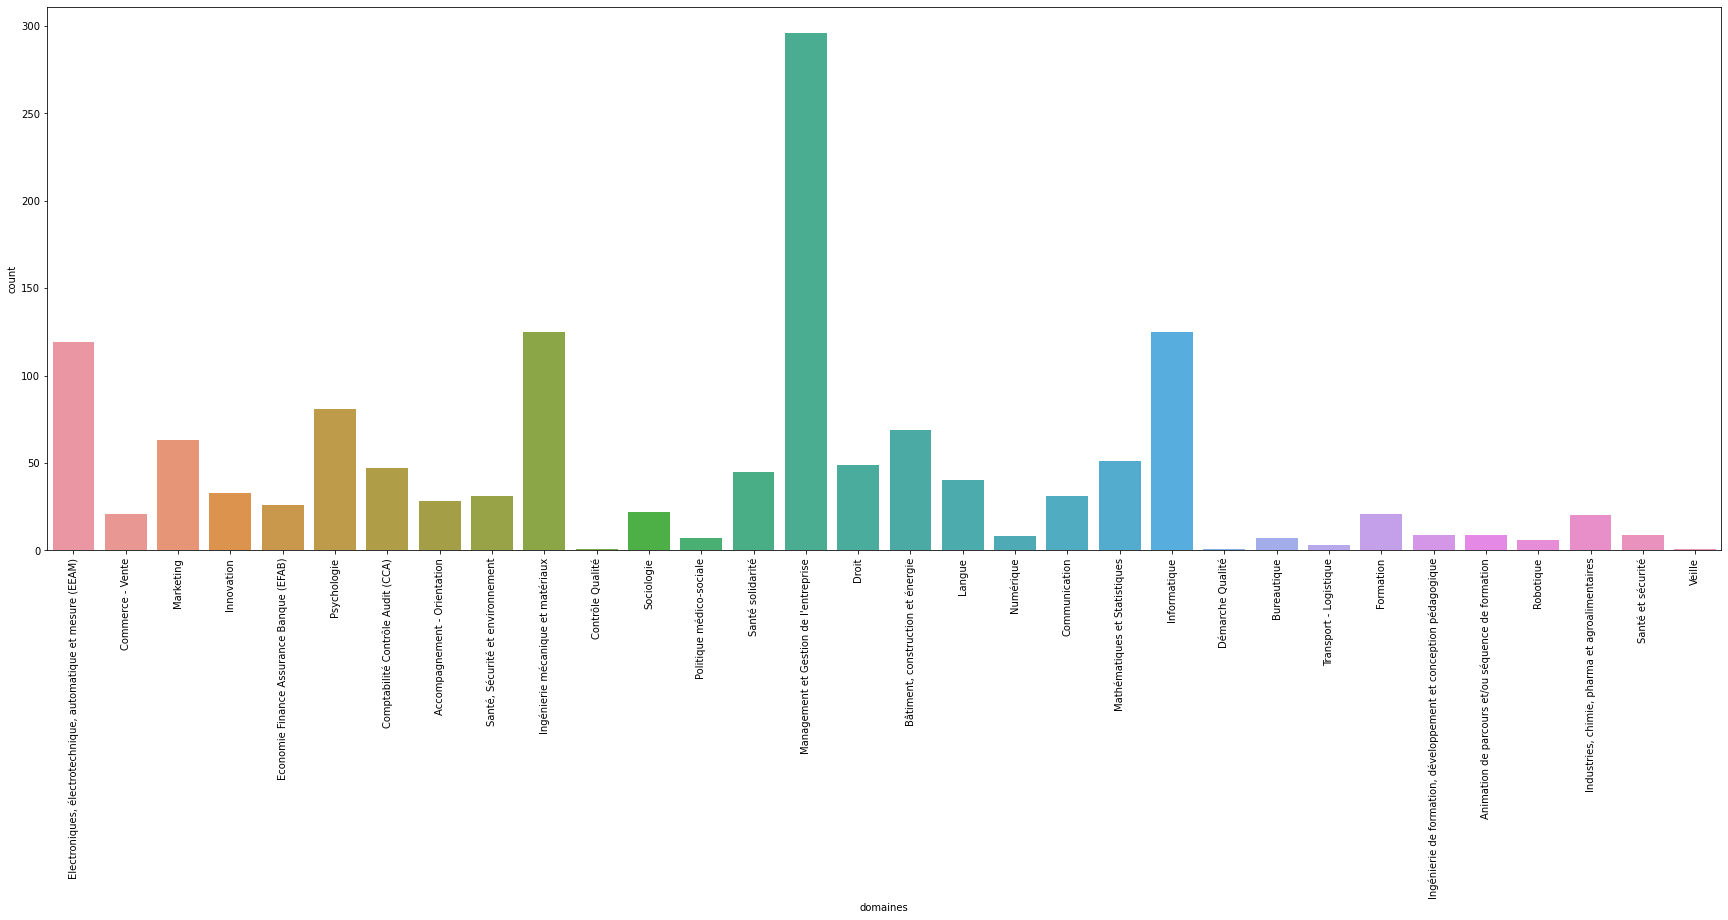

In [99]:
fig=plt.figure(figsize=(30,10))
ax = sns.countplot(x='domaines', data=df_expertise)
ax.set_xticklabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

En 2020, TOP 5 des compétences d'expertise se trouve dans les domaines suivants :
- Management et Gestion de l'entreprise = (Innovation)                288
- Ingénierie mécanique et matériaux                                   125
- Informatique                                                        125
- Electroniques, électrotechnique, automatique et mesure (EEAM)       119
- Psychologie = (Travail, social                                                81

## Sur un échantillon de 54 enseignants qui ont répondu à un questionnaire d'autoévaluation sur les compétences transversales :

#### Comment les enseignants s'autoévaluent sur ces compétences transversales ?
Etude sur les 10 domaines de compétences transversales

In [11]:
df_transversales = cnam_ens_2020.query('competence_transversales != 0')

In [12]:
radar = df_transversales.groupby(['domaines'])['competence_transversales'].mean().sort_values(ascending=False)
radar

domaines
Culture Cnam                                                                             3.777778
Evaluation formative                                                                     3.708075
Promotion, Marketing et Commercial                                                       3.592593
Animation de parcours et/ou séquence de formation                                        3.502575
Ingénierie de formation, développement et conception pédagogique                         3.375000
Administration - Gestion                                                                 3.212963
Management dans un organisme de formation                                                2.985185
Usages du numérique en pédagogie                                                         2.801994
Conseil, Orientation et Accompagnement à la valorisation de compétences individuelles    2.723247
Santé et sécurité                                                                        1.981481
Name: compe

In [81]:
##Construction d'un radar chart pour les compétences transversales

labels=np.array(['Culture Cnam', 'Evaluation formative', 'Promotion, Marketing et Commercial', 'Animation de formation', 
                 'Ingénierie et conception pédagogique', 'Administration - Gestion', 'Management dans un organisme de formation', 
                 'Numérique en pédagogie', 'Orientation, Accompagnement', 'Santé et sécurité'])
values=radar.values

In [82]:
len(values)

10

In [83]:
angles=np.linspace(0, 2*np.pi, 10, endpoint=False)
# close the plot
stats=np.concatenate((radar.values,[radar.values[0]]))

In [84]:
len(angles)

10

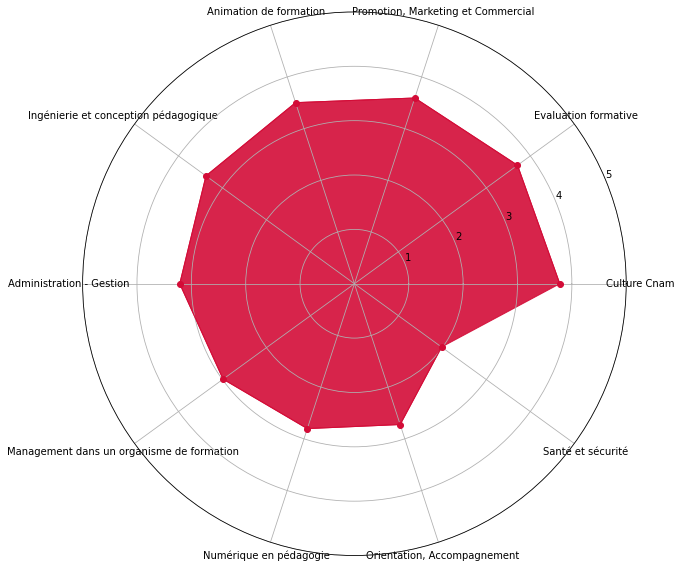

In [98]:
fig=plt.figure(figsize=(30,10))
ax = fig.add_subplot(111, polar=True)
plt.ylim(0,5)
ax.plot(angles, radar.values, 'o-', linewidth=1, color='#D30C37')
ax.fill(angles, radar.values, alpha=0.90, color='#D30C37')
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)